In [11]:
from brainlit.utils.session import NeuroglancerSession
import napari
from napari.utils import nbscreenshot

%gui qt

# Downloading Brain data tutorial
We have prepared 2 brain volumes, as well as axon segment labels, at the below s3 urls (see uploading_brains.ipynb). The method demonstrated below pulls a region of the volume around an annotated axon point set by the user.

## 1) Define Variables
- mip ranges from higher resolution (0) to lower resolution (1).

- v_id are vertex ids ranging from the soma (0) to the end of the axon (1649).

- radius is the radius to pull around the selected point, in voxels.

In [7]:
"""
dir = "s3://open-neurodata/brainlit/brain1"
dir_segments = "s3://open-neurodata/brainlit/brain1_segments"
dir_2 = "s3://open-neurodata/brainlit/brain2"
dir_2_segments = "s3://open-neurodata/brainlit/brain2_segments"
mip = 0
v_id = 0
radius = 75
"""

## 2) Create a NeuroglancerSession instance and download the volume.

In [8]:
"""
# get image and center point
ngl_sess = NeuroglancerSession(mip = mip, url = dir, url_segments=dir_segments)
img, bbox, vox = ngl_sess.pull_voxel(2, v_id, radius)
print(f"\n\nDownloaded volume is of shape {img.shape}, with total intensity {sum(sum(sum(img)))}.")
"""

Downloading: 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]
Downloading: 46it [00:01, 23.83it/s]

Downloaded volume is of shape (151, 151, 151), with total intensity 4946609.



## 3) Generate a graph from the segment data within the volume, and convert it to paths.

In [9]:
"""
G_paths = ngl_sess.get_segments(2, bbox)
G_sub = G_paths[0]
paths = G_paths[1]

print(f"Selected volume contains {G_sub.number_of_nodes()} nodes and {len(paths)} paths")
"""

Downloading: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]
Selected volume contains 6 nodes and 2 paths


## 4) View the volume with paths overlaid via napari.¶

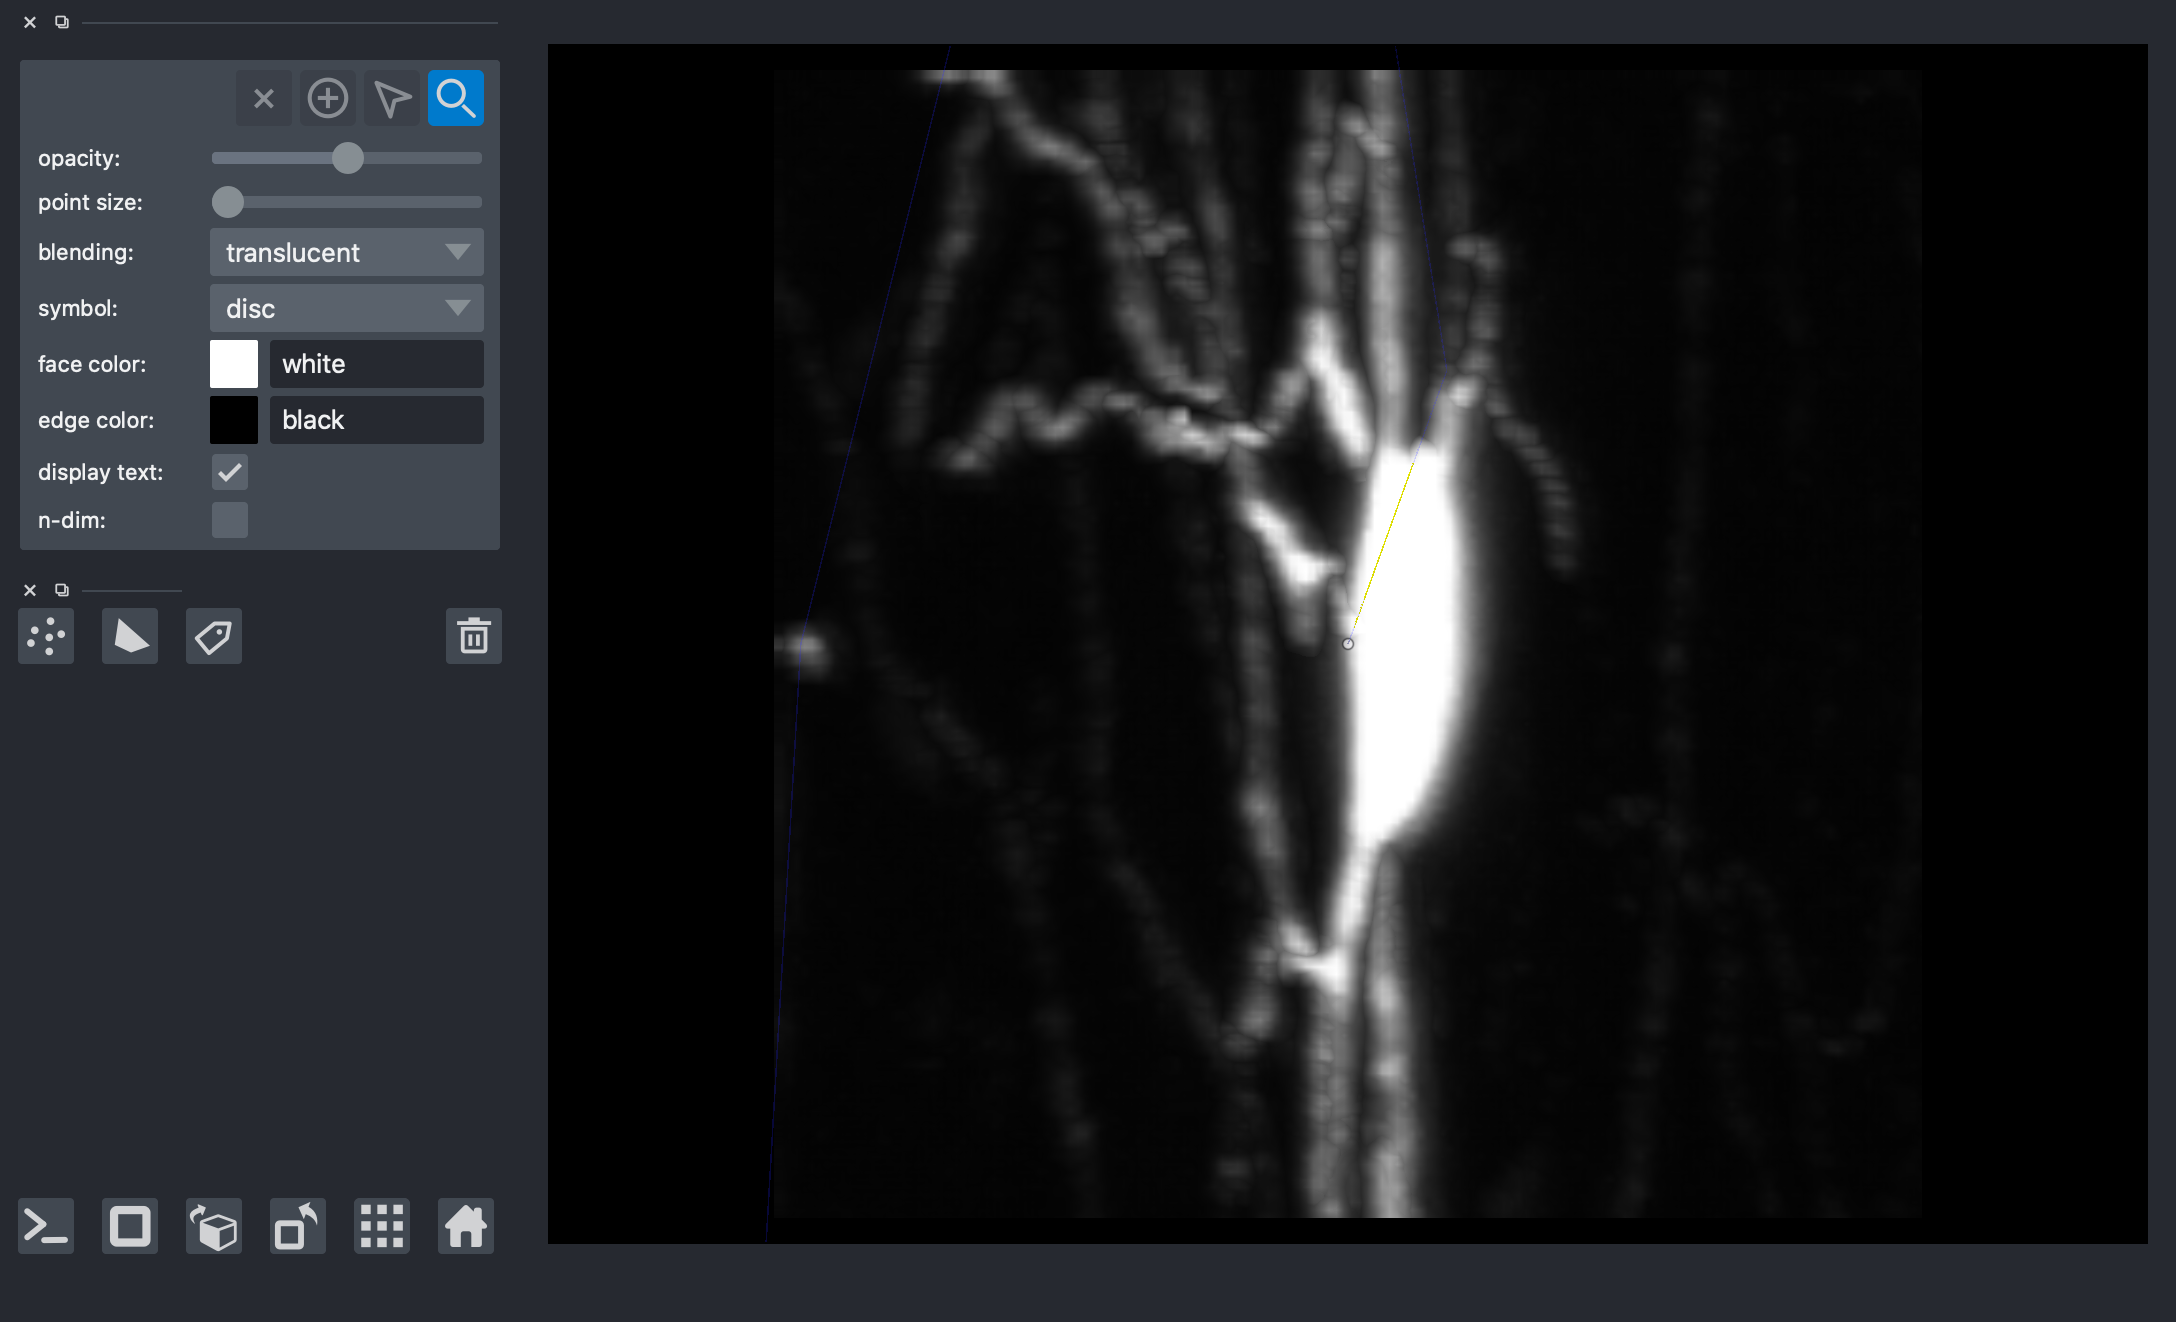

In [12]:
"""
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(img)
viewer.add_shapes(data=paths, shape_type='path', edge_width=0.1, edge_color='blue', opacity=0.1)
viewer.add_points(vox, size=1, opacity=0.5)
nbscreenshot(viewer)
"""